# **Predicting Wine Class Using KNN Classifier Algorithm**

## **Introduction**

Our topic is centered around the composition of wine. The dataset we are using collected results of “chemical analysis” of wine grown by different people within a singular region in Italy (1). In this dataset, there are 13 different columns, which are variables indicating the different measures of composition of wine. Namely, these variables are Alcohol, Malic Acid, Ash, Alkalinity of ash, Magnesium, Total Phenols, Flavonoids, Non-Flavonoid Phenols, Proanthocyanidins, Color intensity, Hue, OD280/OD315 of diluted wines and Proline. There are three different types of wine classes observed in this dataset, and they have been numbered 1,2 or 3 under the column “Class”. The predictive question we will aim to answer is: Given a composition of wine, predict which class, from the 3 possible ones in this dataset, that particular wine belongs to. There are no missing values for any of the variables in this dataset.

**NOTE from Anne: maybe add more background info for which we can use the sources to fill the literature reference requirement**

    -provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
    -clearly state the question you tried to answer with your project
    -identify and describe the dataset that was used to answer the question



Methods & Results:

    describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
    your report should include code which:
        loads data from the original source on the web 
        wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
        performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
        creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
        performs the data analysis
        creates a visualization of the analysis 
        note: all tables and figure should have a figure/table number and a legend



In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
wine_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", col_names = FALSE) |>
    mutate(X1 = as_factor(X1))
colnames(wine_data) <- c("class","alcohol", "malic.acid", "ash", "alcalinity.of.ash","magnesium", "total.phenols",
                         "flavanoids", "nonfalvanoid.phenols", "proanthocyanins", "color.intensity", "hue",
                         "OD280.OD315.of.diluted.wines", "proline")
wine_data

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
set.seed(117)
wine_split <- initial_split(wine_data, prop = 0.75, strata = class)  
wine_training <- training(wine_split)   
wine_testing <- testing(wine_split)
wine_training
wine_testing

class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [5]:
wine_mean <- wine_training |>
    summarise(across(alcohol:proline, mean)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'mean') 
wine_min <- wine_training |>
    summarise(across(alcohol:proline, min)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'min') 
wine_max <- wine_training |>
    summarise(across(alcohol:proline, max)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'max') 
wine_sd <- wine_training |>
    summarise(across(alcohol:proline, sd)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'sd') 

wine_stats <- wine_min |>
    bind_cols(wine_max |> select(max)) |>
    bind_cols(wine_mean |> select(mean)) |>
    bind_cols(wine_sd |> select(sd))

wine_stats

wine_proportions <- wine_training |>
    group_by(class) |>
    summarize(n = n())
wine_proportions

attribute,min,max,mean,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alcohol,11.03,14.83,12.996767,0.8092089
malic.acid,0.74,5.80,2.346842,1.1367047
ash,1.70,3.23,2.369323,0.2805357
⋮,⋮,⋮,⋮,⋮
hue,0.48,1.71,0.9576391,0.2316733
OD280.OD315.of.diluted.wines,1.27,4.00,2.6219549,0.7238538
proline,278.00,1680.00,736.4285714,314.8164276


class,n
<fct>,<int>
1,44
2,53
3,36


Discussion:

    summarize what you found
    discuss whether this is what you expected to find?
    discuss what impact could such findings have?
    discuss what future questions could this lead to?

Our model is able to predict the wine class with an accuracy of (insert value here). A new random observation was then classified as (insert value here). These finding are what we expected and could help wine companies manufacture different types of wines according to their composition. Future questions could be about determining which types of wine are easier to produce based on composition.


References

    At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
    Make sure to cite the source of your data as well.

1. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

2.

3.


### Daniel Part

## We will first explore the data

In [8]:
library(tidyverse)

In [9]:
head(wine_data)

class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [10]:
glimpse(wine_data)

Rows: 178
Columns: 14
$ class                        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ alcohol                      <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20,…
$ malic.acid                   <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87,…
$ ash                          <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45,…
$ alcalinity.of.ash            <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6,…
$ magnesium                    <dbl> 127, 100, 101, 113, 118, 112, 96, 121, 97…
$ total.phenols                <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50,…
$ flavanoids                   <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52,…
$ nonfalvanoid.phenols         <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30,…
$ proanthocyanins              <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98,…
$ color.intensity              <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25,…
$ hue                          <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02,…
$ OD280.OD315.of.d

In [14]:
wine_data |>
    pull(class) |>
    levels()

[1] "1" "2" "3"

### Exploring the cancer data

In [24]:
num_obs <- nrow(wine_data)

In [30]:
wine_data |>
    group_by(class) |>
    summarize(
    count = n(),
    percentage = n() / num_obs * 100
    )


class,count,percentage
<fct>,<int>,<dbl>
1,59,33.14607
2,71,39.88764
3,48,26.96629


### Looking at the relationship between Class and Alcohol Content

NULL

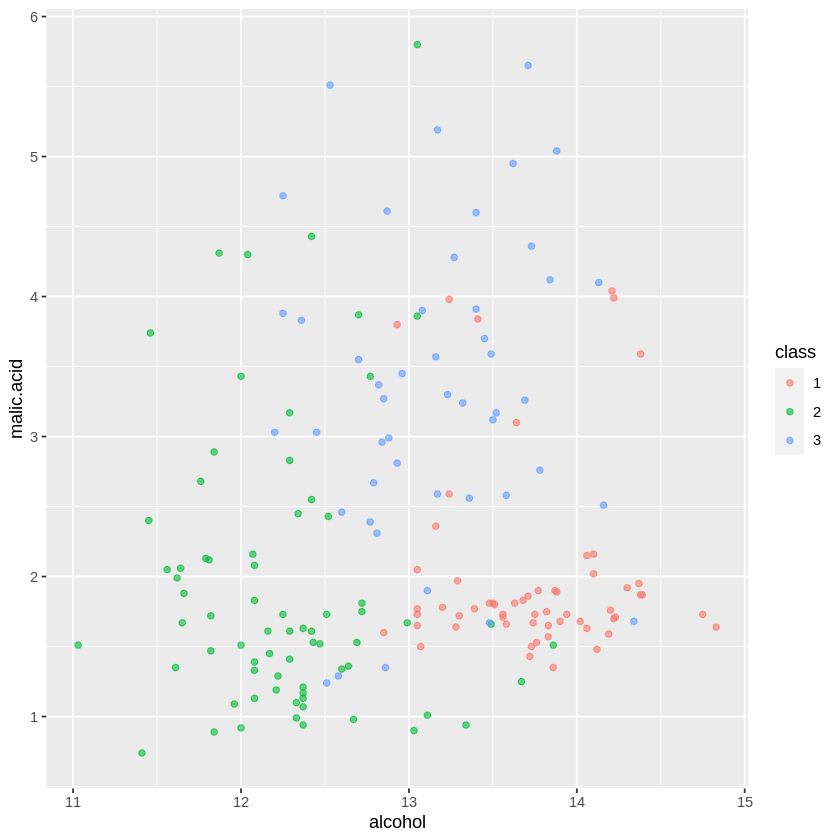

In [37]:
wine_plot  <- wine_data  |>
  ggplot(aes(x = alcohol, y = malic.acid, color = class)) +
  geom_point(alpha = 0.6)
  labs(x = "Perimeter (standardized)", 
       y = "Concavity (standardized)",
       color = "Diagnosis") +
  scale_color_manual(labels = c("Malignant", "Benign"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))

wine_plot

### Classification using KNN Algorithm

In [38]:
library(tidymodels)

In [42]:
wine_train <- wine_data |>
    select(class, alcohol, malic.acid)

In [45]:
head(wine_train)

class,alcohol,malic.acid
<fct>,<dbl>,<dbl>
1,14.23,1.71
1,13.20,1.78
1,13.16,2.36
1,14.37,1.95
1,13.24,2.59
1,14.20,1.76


### Creating a model specification

In [47]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

In [48]:
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


In [51]:
knn_fit <- knn_spec |>
    fit(class ~ alcohol + malic.acid, data = wine_data)

In [53]:
knn_fit <- knn_spec |>
    fit(class~., data = wine_train)

In [54]:
knn_fit

parsnip model object


Call:
kknn::train.kknn(formula = class ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1910112
Best kernel: rectangular
Best k: 5

### Predicting  a new variable

In [55]:
new_obs <- tibble(alcohol = 0, malic.acid = 0)

In [56]:
predict(knn_fit, new_obs)

.pred_class
<fct>
2


### Data Preprocessing

In [67]:
unscaled_wine = wine_data
 

In [68]:
head(unscaled_wine)

class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [74]:
unscaled_wine <- unscaled_wine |>
    select(class, alcohol, malic.acid)


In [75]:
uc_recipe <- recipe(class ~., data = unscaled_wine)

In [76]:
print(uc_recipe)

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2


In [81]:
uc_recipe <- uc_recipe |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()
uc_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 178 data points and no missing data.

Operations:

Scaling for alcohol, malic.acid [trained]
Centering for alcohol, malic.acid [trained]
Scaling for alcohol, malic.acid [trained]
Centering for alcohol, malic.acid [trained]
Scaling for alcohol, malic.acid [trained]
Centering for alcohol, malic.acid [trained]

In [87]:
scaled_wine <- bake(uc_recipe, unscaled_wine)
scaled_wine

alcohol,malic.acid,class
<dbl>,<dbl>,<fct>
1.5143408,-0.56066822,1
0.2455968,-0.49800856,1
0.1963252,0.02117152,1
⋮,⋮,⋮
0.3318221,1.7398366,3
0.2086431,0.2270533,3
1.3911617,1.5787118,3


### Balancing

In [89]:
wine_data |>
  group_by(class) |>
  summarize(n = n())
    

class,n
<fct>,<int>
1,59
2,71
3,48


### We see that there is class imbalance with our data

In [96]:
library(tidymodels)
library(themis)

ERROR: Error in library(themis): there is no package called ‘themis’


In [94]:
ups_recipe <- recipe(Class ~ ., data = wine_data) |>
  step_upsample(class, over_ratio = 1, skip = FALSE) |>
  prep()

ups_recipe

ERROR: Error in step_upsample(recipe(Class ~ ., data = wine_data), class, over_ratio = 1, : could not find function "step_upsample"
